# Assignment 4 (Oct 12)

Today we will talk about **Monte Carlo (MC)** methods, techniques that involve random sampling. But before we dive into that, 
we will need to learn a little bit about random numbers in Python.

We will go over:

1. Python Numpy Random Generator: `np.random.default_rng()`
2. Plot histogram
3. Monte Carlo -- Uncertainty Propagation
4. Monte Carlo -- Bootstrapping

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

- [SPIRL Ch. 3.6. Conditionals](https://cjtu.github.io/spirl/python_conditionals.html#conditionals)
- [Numpy Random Generator](https://numpy.org/doc/stable/reference/random/generator.html)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Random Number Generators (RNGs)

To work with random numbers in Python, we can use the `random` module within `numpy`.

### Pseudo-random number generators (PRNG)

It might sound easy to come up with a random number, but many surveys have found this to not be the case (e.g. [Asking 8500 students to pick a random number](https://www.reddit.com/r/dataisbeautiful/comments/acow6y/asking_over_8500_students_to_pick_a_random_number/)).

Because computers are deterministic (a collection of switches that can be "on" or "off"), it is surprisingly hard to produce a set of numbers that are truly random.  Luckily, we often don't need a *truly* random set of numbers. Usually when we say we want random numbers, we want a set of numbers that are:

- not biased to any particular value 
- contain no repeated or recognizable patterns

This is where a **pseudorandom number generator (PRNG)** can help.

See what Wikipedia tell us about the PRNG:

> A pseudorandom number generator (PRNG), also known as a deterministic random bit generator (DRBG), is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers. The PRNG-generated sequence is not truly random, because it is completely determined by an initial value, called the PRNG's seed (which may include truly random values).

The key "flaw" with a PRNG is that if you know a special value called the **seed**, you can regenerate the exact same sequence of random numbers again. But this ends up being a useful *feature* of PRNGs as we'll see later.

Since all computer generated random number generators are PRNGs, we often just drop the "P" and simply call them **random number generators (RNGs)** (but now you know their secret).

Read more about [Pseudorandom number generators on Wikipedia](https://en.wikipedia.org/wiki/Pseudorandom_number_generator).

### NumPy Random Module (`np.random`)

In NumPy, there are two ways to generate random numbers:

- Calling functions in `random` directly (**deprecated**): `np.random.func()`
- Generating an `rng` object with `obj = np.random.default_rng()` and calling methods on it: `obj.method()`

There are also different algorithms you can use to generate random numbers and if you mix and match RNG algorithms, you won't be guaranteed the same random numbers even if you know the **seed**. This is why random numbers in different programming languages won't necessarily be the same with the same seed (read more about [NumPy bit generators](https://numpy.org/doc/stable/reference/random/bit_generators/index.html)). For almost all applications, the `default_random` from NumPy is sufficient (see [NumPy simple random data](https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data). Let's try it out!

In [3]:
# Initialize the random number generator object
rng = np.random.default_rng()
# help(rng.integers)

Let's first try to generate random intergers with the `rng.integers()` function:

```
rng.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

Return random integers from `low` (inclusive) to `high` (exclusive), or
if endpoint=True, `low` (inclusive) to `high` (inclusive). Replaces
`RandomState.randint` (with endpoint=False) and
`RandomState.random_integers` (with endpoint=True)

Return random integers from the "discrete uniform" distribution of
the specified dtype. If `high` is None (the default), then results are
from 0 to `low`.
...
```

In [4]:
# Draw random intergers from the range `draw_range` `ndraws` times.
draw_range = (0, 10)  # (low, high)
ndraws = 8  # how many to generate or "draw"

random_ints = rng.integers(*draw_range, ndraws)

print(random_ints)

[8 4 1 2 1 1 9 2]


Now use `for` loop to run it many times to see if any are duplicated:

In [5]:
rng = np.random.default_rng()
for i in range(10):
    random_ints = rng.integers(*draw_range, ndraws)
    print(f'Run {i}: ', random_ints)

Run 0:  [8 5 8 1 7 8 5 4]
Run 1:  [5 2 8 1 4 0 6 7]
Run 2:  [0 5 9 8 0 2 5 1]
Run 3:  [0 3 8 8 6 6 2 8]
Run 4:  [8 3 9 8 2 8 6 0]
Run 5:  [7 2 1 7 9 9 5 5]
Run 6:  [1 7 8 3 4 4 1 1]
Run 7:  [9 9 6 6 1 4 1 1]
Run 8:  [1 3 2 1 1 8 1 2]
Run 9:  [4 8 6 6 5 6 7 7]


But remember: these are *pseudo*random numbers, meaning we can generate the same random sequence again if we know the **seed** value.

This time, see what happens when we re-make the rng object with the same seed each time in the loop.

In [6]:
draw_range = (0, 10)
ndraws = 10
seed = 100
 
for i in range(10):
    rng = np.random.default_rng(seed=seed)  # seed the default RNG
    random_ints = rng.integers(*draw_range, ndraws)
    print(f'run {i} give: ', random_ints)

run 0 give:  [7 8 1 5 0 2 4 0 5 9]
run 1 give:  [7 8 1 5 0 2 4 0 5 9]
run 2 give:  [7 8 1 5 0 2 4 0 5 9]
run 3 give:  [7 8 1 5 0 2 4 0 5 9]
run 4 give:  [7 8 1 5 0 2 4 0 5 9]
run 5 give:  [7 8 1 5 0 2 4 0 5 9]
run 6 give:  [7 8 1 5 0 2 4 0 5 9]
run 7 give:  [7 8 1 5 0 2 4 0 5 9]
run 8 give:  [7 8 1 5 0 2 4 0 5 9]
run 9 give:  [7 8 1 5 0 2 4 0 5 9]


## Plot histogram with `plt.hist`

We can verify how random our values are using a histogram.

`help(plt.hist)`

```
hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
...
    Returns
    -------
    n : array or list of arrays
        The values of the histogram bins. See *density* and *weights* for a
        description of the possible semantics.  If input *x* is an array,
        then this is an array of length *nbins*. If input is a sequence of
        arrays ``[data1, data2,..]``, then this is a list of arrays with
        the values of the histograms for each of the arrays in the same
        order.  The dtype of the array *n* (or of its element arrays) will
        always be float even if no weighting or normalization is used.
    
    bins : array
        The edges of the bins. Length nbins + 1 (nbins left edges and right
        edge of last bin).  Always a single array even when multiple data
        sets are passed in.
    
    patches : list or list of lists
        Silent list of individual patches used to create the histogram
        or list of such list if multiple input datasets.
...
```

We will also use a convenient helper function to take care of some of our plot formatting.

In [7]:
# If we want to apply the same format to each plot, we can make it a function!
def set_plot_axis_label(ax, xlabel, ylabel):
    """
    Set formatting options on a matplotlib ax object.
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The ax object to format.
    xlabel : str
        The x-axis label.
    ylabel : str
        The y-axis label.
    """
    ax.tick_params(axis='both', which ='both', labelsize='small', right=True, 
                     top=True, direction='in')   
    ax.set_xlabel(xlabel, size='medium', fontname='Helvetica')
    ax.set_ylabel(ylabel, size='medium', fontname='Helvetica')

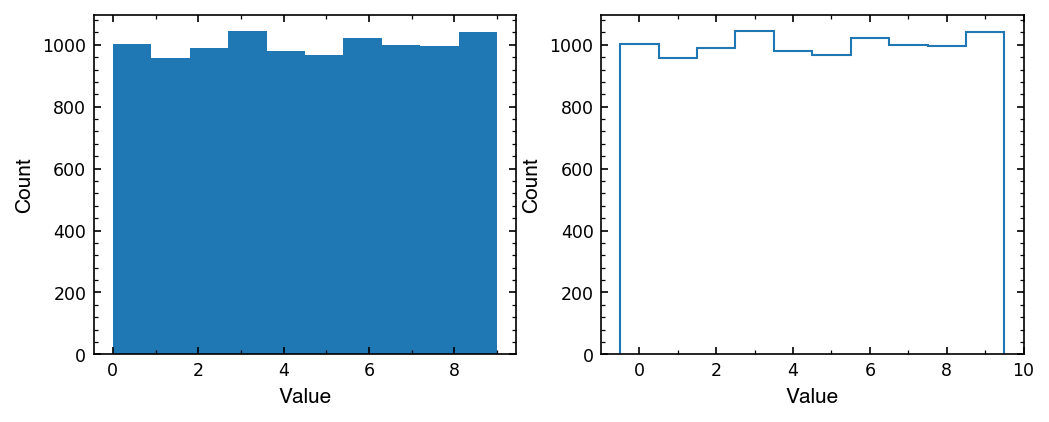

In [15]:
# random number setup
draw_range = (0, 10)
ndraws = 10000  # Try doing different numbers of draws

# Do random draws
rng = np.random.default_rng()  
random_ints = rng.integers(*draw_range, ndraws)

# Set up plot and plot the histogram
fig, axs = plt.subplots(1, 2, facecolor='white', figsize=(8, 3), dpi=150)

# Default hist
n, edges, _ = axs[0].hist(random_ints)
set_plot_axis_label(axs[0], 'Value', 'Count')  # Our helper function


# Center the bins and show as a "step" function
n, edges, _ = axs[1].hist(random_ints, range=(-0.5, 9.5), bins=10, 
                          histtype='step')
set_plot_axis_label(axs[1], 'Value', 'Count')  # Our helper function

# add subticks for both axises
from matplotlib.ticker import AutoMinorLocator
for axi in range(2):
    axs[axi].xaxis.set_minor_locator(AutoMinorLocator(2))
    axs[axi].yaxis.set_minor_locator(AutoMinorLocator(5))


Let's see what our histogram actually gave us in the `n` and `edges` it returned.

In [16]:
print(f'Number in each bins: {n}')
print(f'Edges of each bin: {edges}')

Number in each bins: [1003.  956.  991. 1045.  979.  967. 1023.  998.  997. 1041.]
Edges of each bin: [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


Now, let's overplot these data points back to the histogram.

But, before that, we need to find out the center values of the each bins (we only have the left and right edges currently).

### [Short Quiz] Find the bin centers from `edges` array 

Try to write code to covert bin edges to bin centers (copying the following list is cheating! We want to do it in general).

```python
edges = [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]
```
into
```python
bin_center = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```



In [17]:
# put you code here, you have 5 mins
edges
bin_center = [(edges[i] + edges[i+1]) / 2 for i in range(len(edges)-1)]
print(bin_center)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [18]:
# Answer 1 -- using the for loop

bin_center = []
for i in range(len(edges)-1):
    bin_center.append((edges[i] + edges[i+1]) / 2)
print(bin_center)  

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


### [Side note:] List comprehensions

List comprehensions are a fancy way to make a list using a simple 1 line `for` loop.

The basic syntax is square brackets `[]` with the familiar `for i in blah` inside.

For example:

In [19]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The `i` at the beginning is just our loop variable and indicates what we want Python to be put in the final list. So we can also do math or functions on that loop variable, as we would in a for loop.

In [20]:
squared = [n**2 for n in range(10)]

# This is equivalent to:
squared2 = []
for n in range(10):
    squared2.append(n**2)

print(squared)
print(squared2)
print(squared == squared2)  # "==" tests for equality

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
True


Getting back to our problem of converting bin edges to bin centers, we can do this with a list comprehension! 

**Note:** This is about as complicated as a list comprehension should ever get. It is already a little tricky to read as is which can make bugs harder to spot. When in doubt, you can just use a traditional `for` loop and lay each step out so it's easier to understand later!

In [21]:
# Answer 2 -- using the list comprehension

bin_center = [(edges[i] + edges[i+1]) / 2 for i in range(len(edges)-1)]
print(bin_center)  

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


Finally, we have a 3rd solution which takes advantage of NumPy array indexing, slicing, and element-wise math. We call this **vectorization** and it is usually the most efficient way to solve a mathematical problem with code. It also often uses less code which can be good, since less code has less room for errors. 

Vectorizing code takes a little practice. The main idea is to think about arrays as collections of numbers we can do math on all at once.

In [22]:
# Answer 3 -- array slicing (recommended)

bin_center = (edges[:-1] + edges[1:]) / 2
print(bin_center) 

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Let's break that example down to see what we did:

In [15]:
print(edges[:-1])  # All edges except the last one
print(edges[1:])   # All edges except the first one

# Now we have 2 arrays of elements but they are offset by 1
# Now we want to take the avg of these adjacent elements to get the centers
print((edges[:-1] + edges[1:]) / 2)  # Mean is just (prev_el + next_el) / 2

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Whichever way you figured out how to compute the bin centers, we can now plot them on our histogram!

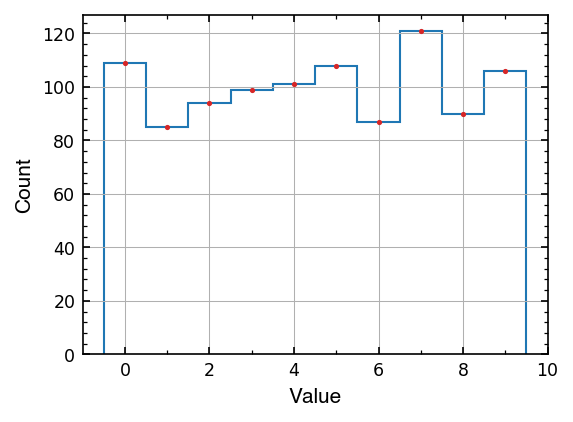

In [23]:
# random number setup
draw_range = (0, 10)
ndraws = 1000

rng = np.random.default_rng()
random_ints = rng.integers(*draw_range, 
                            ndraws)

# plotting
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax1 = f.subplots(1, 1)

# plot the histogram
n, edges, _ = ax1.hist(random_ints, range = (-0.5, 9.5), bins=10, histtype='step')

bin_center = (edges[:-1] + edges[1:])/2
ax1.plot(bin_center, n, '.', ms=3, c='tab:red')
set_plot_axis_label(ax1, 'Value', 'Count')


ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.grid(lw=0.5)

## NumPy Random - random draws from a distribution

We can draw from a variety of statistical distributions using our `numpy.random.default_rng` object (see all of them at [NumPy Random Distributions](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

We'll see this in action with the normal (Gaussian) distribution.

```
normal(...) method of numpy.random._generator.Generator instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution. Must be
        non-negative.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``loc`` and ``scale`` are both scalars.
        Otherwise, ``np.broadcast(loc, scale).size`` samples are drawn.
...
```

In the docstring for `rng.normal`, we can see it asks for a `loc` (mean) and `scale` (standard deviation) of the Gaussian distribution to randomly draw from.

In [17]:
# random number setup
draw_mean_std = (10, 0.2)  # (mean, stdev)
ndraws = 10

rng = np.random.default_rng()
draws = rng.normal(*draw_mean_std, ndraws)

print(draws)

[ 9.94068927  9.8205405   9.88139722 10.17209103  9.60758777 10.17924149
 10.38698644  9.79443812  9.85625561 10.19956023]


Similarly to above, we can see that after many draws, our histogram begins to look like a typical Gaussian "bell curve" centered at the mean with standard deviation spread.

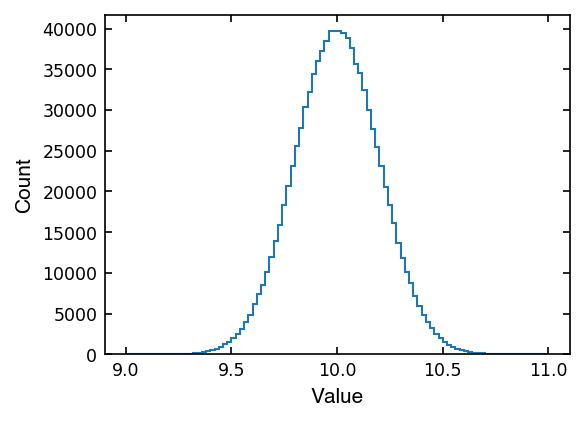

In [18]:
# random number setup
draw_mean_std = (10, 0.2)
ndraws = 1000000  # <- try changing the number of draws

rng = np.random.default_rng()
draws = rng.normal(*draw_mean_std, ndraws)

# plotting 
f = plt.figure(facecolor='white', figsize=(4, 3), dpi=150)
ax = f.subplots(1, 1)

n, edges, _ = ax.hist(draws, histtype='step', range=(9, 11), bins=100)
set_plot_axis_label(ax, 'Value', 'Count')

# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

## Monte Carlo -- Uncertainty (error) Propagation

Recall last week we had a simple measurement with some error associated with it.

What happens when we cannot measure a quantity and its error directly but still want to estimate the errors on it?

This is a job for **error propagation**!

### Error propagation (analytical)

If you only feed your measurement data through simple functions, we can "propagate" that error with the following error propagation equations:

![Uncertainty Propagation](http://science.clemson.edu/physics/labs/tutorials/errorp/eptable.gif)

(from Clemson University)

This is the "analytical" way to propagate errors since we have well defined functions and can plug values in to compute the final errors.

For example, say we had a study where we measured a participant's height ($H_{\rm height}$) and then the length of their hair ($H_{\rm hair}$). We want to find what their "total height ($H_{\rm total}$)" is if they were to pull their hair straight up. 

$H_{\rm total} = H_{\rm height} + H_{\rm hair}$

You might imagine that a single measurement will sometimes give biases values, so multiple measurements of both parameters ($H_{\rm height}$, $H_{\rm hair}$) are the way to go. The more measurements you get from both parameters the closer the mean value will be to the true value and the smaller the uncertainty (the standard deviation, std) will be. 

Now, suppose you done 10 measurements for both $H_{\rm height}$ and $H_{\rm hair}$. As good scientists, we want an accurate way to estimate the error of the $H_{\rm total}$. One way to do it will be just add up those 10 sets of $H_{\rm height}$ and $H_{\rm hair}$ values to get 10 $H_{\rm total}$, and take a the std. The other way will be using the first formula above in the table with the means and stds of $H_{\rm height}$ and $H_{\rm hair}$:

$$\sigma_{H_{\rm total}} = \sqrt{\sigma_{H_{\rm height}}^2 + \sigma_{H_{\rm hair}}^2}$$

In [19]:
# measurements
heights      = np.array([1.93, 1.82, 2.08, 2.01, 1.46, 1.34, 1.75, 2.2 , 1.95])
hair_lengths = np.array([0.01, 0.56, 0.23, 0.27, 0.21, 0.1 , 0.04, 0.06, 0.15])

# Fist moethod:
htotal = heights + hair_lengths

htotal_avg = np.mean(htotal)
htotal_std = np.std(htotal)

print(f"This person's total height using method 1 is {htotal_avg:1.2f} +/- {htotal_std:1.3f} m")

This person's total height using method 1 is 2.02 +/- 0.310 m


In [20]:
# Second method:

heights_avg = np.mean(heights)
hair_lengths_avg = np.mean(hair_lengths)

heights_std = np.std(heights)
hair_lengths_std = np.std(hair_lengths)

print(f"The H_height = {heights_avg:1.2f} +/- {heights_std:1.3f} m")
print(f"The H_hair = {hair_lengths_avg:1.2f} +/- {hair_lengths_std:1.3f} m")

htotal_avg = heights_avg + hair_lengths_avg
htotal_std = np.sqrt(heights_std**2 + hair_lengths_std**2)

print(f"This person's total height using method 2 is {htotal_avg:1.2f} +/- {htotal_std:1.3f} m")

The H_height = 1.84 +/- 0.266 m
The H_hair = 0.18 +/- 0.158 m
This person's total height using method 2 is 2.02 +/- 0.310 m


Yay we got to report errors like good scientists! But we said this section was about randomness... 

Say now you only know the mean and std of $H_{\rm height}$ and $H_{\rm hair}$, is it still possible to get the uncertainty of $H_{\rm total}$ using the first method?? Want to avoid the fancy error propagation formulas... Here is when the MC error propagation come it!

The idea here is that as long as our errors are normal (Gaussian), we can randomly draw $H_{\rm height}$ and $H_{\rm hair}$ values from a Gaussian distribution based on the mean and std of $H_{\rm height}$ and $H_{\rm hair}$. With these values, we can calculate the $\sigma_{H_{\rm total}}$ using the first method.

We already know how to draw values from a Gaussian using our RNG so let's try it!

In [24]:
# Start with the same data and add it, compute the mean as usual
heights = np.array([1.93, 1.82, 2.08, 2.01, 1.46, 1.34, 1.75, 2.2 , 1.95])
hair_lengths = np.array([0.01, 0.56, 0.23, 0.27, 0.21, 0.1 , 0.04, 0.06, 0.15])

h_totals = heights + hair_lengths

ndraws = 1000000
rng = np.random.default_rng(seed=100)  # <- remove seed to see other random results

# Make our random arrays using the mean, standard dev of our measurements
g_height = rng.normal(np.mean(heights), np.std(heights), ndraws)
g_hair   = rng.normal(np.mean(hair_lengths), np.std(hair_lengths), ndraws)

# Feed the gaussian samples through the sum
g_total_arr = g_height + g_hair
h_mean = np.mean(g_total_arr)

# Because the error propagation formula for mean is just a standard deviation
# we can estimate the error of the mean with the stdev of our total array
g_mean_err = np.std(g_total_arr)

# Now we report the same meanbut can use the gaussian standard dev as the err
print(f"Mean total height (N={ndraws}): {h_mean:.2f} +/- {g_mean_err:.3f}")

Mean total height (N=1000000): 2.02 +/- 0.310


The larger the ndraws you use, the more stable the g_mean_err will be.

We can try increasing the number of draws by hand to see when it levels out, but we have the power of code!

Let's write up some code to see how many draws we need to get a stable g_mean_err.

We can define stable as *changes by less than* $10^{-4}$ for now.

In [25]:
# using for loop
rng = np.random.default_rng(seed=100)
g_mean_err_old = np.inf  # Pick large value to start us off

for ndraws in np.logspace(1, 7, 10):
    ndraws = int(ndraws)
    g_height = rng.normal(np.mean(heights), np.std(heights), ndraws)
    g_hair = rng.normal(np.mean(hair_lengths), np.std(hair_lengths), ndraws)
    g_total_arr = g_height + g_hair
    g_mean_err = np.std(g_total_arr)
    
    delta_err = np.abs(g_mean_err_old - g_mean_err)
    print(f'N={ndraws:.1e}: err={g_mean_err:.3f} (changed by {delta_err:.1e})')
    if delta_err < 1e-4: 
        print('Changed by < 1e-4! Exiting loop...')
        break
    g_mean_err_old = g_mean_err

print(f'\n The uncertainty of the total height is about: {g_mean_err:1.3f} N={ndraws}')

N=1.0e+01: err=0.237 (changed by inf)
N=4.6e+01: err=0.282 (changed by 4.4e-02)
N=2.2e+02: err=0.306 (changed by 2.4e-02)
N=1.0e+03: err=0.305 (changed by 1.7e-03)
N=4.6e+03: err=0.313 (changed by 8.8e-03)
N=2.2e+04: err=0.310 (changed by 3.4e-03)
N=1.0e+05: err=0.310 (changed by 3.2e-05)
Changed by < 1e-4! Exiting loop...

 The uncertainty of the total height is about: 0.310 N=100000


In [26]:
# using while loop
g_mean_err_old = np.inf  # <- something big to start us off
delta_err = np.inf
ndraws_arr = np.logspace(1, 7, 10)
rng = np.random.default_rng(seed=100)

# Stop loop when the difference drops below 1e-4
i = 0
while delta_err >= 1e-4:
    ndraws = int(ndraws_arr[i])
    g_height = rng.normal(np.mean(heights), np.std(heights), ndraws)
    g_hair   = rng.normal(np.mean(hair_lengths), np.std(hair_lengths), ndraws)
    g_total_arr = g_height + g_hair
    g_mean_err = np.std(g_total_arr)

    delta_err = np.abs(g_mean_err - g_mean_err_old)
    print(f'N={ndraws:.1e}: err={g_mean_err:.3f} (changed by {delta_err:.1e})')
    
    g_mean_err_old = g_mean_err
    i += 1
    
# Now we can report our mean with confidence in our error precision 
print(f'\n The uncertainty of the total height is about: {g_mean_err:1.3f} with N={ndraws}')  

N=1.0e+01: err=0.237 (changed by inf)
N=4.6e+01: err=0.282 (changed by 4.4e-02)
N=2.2e+02: err=0.306 (changed by 2.4e-02)
N=1.0e+03: err=0.305 (changed by 1.7e-03)
N=4.6e+03: err=0.313 (changed by 8.8e-03)
N=2.2e+04: err=0.310 (changed by 3.4e-03)
N=1.0e+05: err=0.310 (changed by 3.2e-05)

 The uncertainty of the total height is about: 0.310 with N=100000


Now we have an "empirical" estimate of our final error which didn't need error propagation formulas! 

Monte Carlo error propagation is particularly useful when you need to do a lot of manipulations to your data and don't want to write out all the propagation formulas by hand. It is also useful when your analysis involves more complicated functions than just addition, subtraction, multiplication, division (e.g., exponentials, logarithms, other non-linear functions, etc).

## [Assignment 1] 

If you have something like

$$\rho = \frac{m}{V} = \frac{m}{\pi r^2 (h/3)} = \frac{3m}{\pi r^2 h}$$

How fast can you get the error of the density ($\rho$) propagated from errors of $m$, $r$, and $h$?

|                 | units | values | uncertainty ($\sigma$) |
|-----------------|:-----:|:------:|:----------------------:|
| Mass (m)        |   g   |  55.5  |          4.52          |
| Cone radius (r) |   cm  |  14.2  |          1.11          |
| Cone height (h) |   cm  |   9.9  |          0.59          |

modified from [Steve Spicklemire's youtube video](https://www.youtube.com/watch?v=V4U6RFI6HW8&t=298s)

1. Estimate the error of the density ($\rho$)
2. How many draws (`ndraws`) do we need to get a stable $\rho$ value? (follow the steps in the previous code cell)

## [Challenge!]

1. Use a more strict stable condition: `differ < 1e-6` must meet for 10 consecutive `ndraws`
2. Find a better/faster way to reach that stable values

In [57]:
# [your code here]
g_mean_err_old = np.inf  # <- something big to start us off
delta_err = np.inf
ndraws_arr = np.logspace(1, 7, base=10)
rng = np.random.default_rng(seed=100)

# Stop loop when the change per step is <1e-4
i = 0
while delta_err >= 1e-4: 
    ndraws = int(ndraws_arr[i])
    g_mass = rng.normal(55.5, 4.52, ndraws)
    g_rad = rng.normal(14.2, 1.11, ndraws)
    g_ht = rng.normal(9.9, 0.59, ndraws)
    g_rho_arr = 3 * g_mass / (np.pi * g_rad**2 * g_ht)
    g_mean_err = np.std(g_rho_arr)

    delta_err = np.abs(g_mean_err - g_mean_err_old)
    
    #print(f'N={ndraws:.1e}: err={g_mean_err:.3f} (changed by {delta_err:.1e})')
    
    g_mean = np.mean(g_rho_arr)
    g_mean_err_old = g_mean_err
    i += 1
    
# Now we can report our mean with confidence in our error precision 
print(f'\n The mean value for rho: {g_mean:1.3f} g/cm^3') 
print(f'\n The uncertainty in rho is about: {g_mean_err:1.3f} g/cm^3, or {100*g_mean_err/g_mean:1.3f}% with N={ndraws:10.0f}')  


 The mean value for rho: 0.026 g/cm^3

 The uncertainty in rho is about: 0.004 g/cm^3, or 15.078% with N=        17


## Monte Carlo -- Bootstrapping

We can also use Monte Carlo methods to "bootstrap" confidence intervals on our measured quantities. This is often useful when we have a small sample of measurements and don't know the errors involved. Using the scatter inherent in our data and our handy random number generator, we can still get a statistical measure of errors as confidence intervals, pulling the data up by its bootstraps.

**Note:** The main assumption with bootstrapping is that all measurements are *iid normal*, meaning each observation was collected independently of other measurements and is expected to have normal (Gaussian) errors.

Modified from [Introduction to Statistical Methodology, Second Edition Chaper 3](https://bookdown.org/dereksonderegger/570/3-confidence-intervals-via-bootstrapping.html)

Let's read in an array of data that measures the mercury levels of several lakes in Florida.

In [25]:
# We'll do a deep dive on pandas soon! for now we're just using it to get data
import pandas as pd
df = pd.read_csv('https://www.lock5stat.com/datasets3e/FloridaLakes.csv')
avg_mercury = df['AvgMercury'].to_numpy()
print('N measurements:', len(avg_mercury))

N measurements: 53


Let's make a histogram to see what we're looking at!

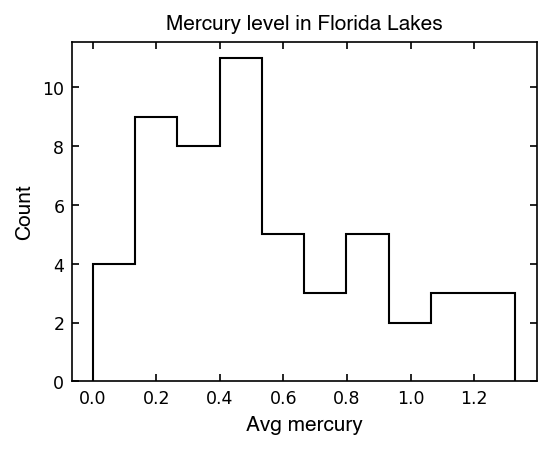

In [26]:
# Plot a histogram 
fig, ax = plt.subplots(facecolor='white', figsize=(4,3), dpi=150)
set_plot_axis_label(ax, 'Avg mercury', 'Count')
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')
ax.hist(avg_mercury, histtype='step', range=(0, np.max(avg_mercury)), bins=10,
        color='black')
plt.show()

Hmm this histogram doesn't look very Gaussian... it seems a little skewed (not symmetrical). 

When we have a skewed distribution, the mean of the value is not always the best measure of the center of the values. Also, what would the standard deviation be? So far we've only seen symmetrical scatter in our data...

We can still calculate them but they may not represent the data as nicely as the examples we've seen so far.

In [27]:
print(f'Mean mercury in Florida lakes is {np.mean(avg_mercury):1.2f}, +/- {np.std(avg_mercury):.3f}')

Mean mercury in Florida lakes is 0.53, +/- 0.338


When we have small numbers of observations that are skewed, we can't always be confident that the mean and standard deviation are good measures of the underlying distribution in our data. This is where **bootstrapping** becomes very useful!

This time we will use `rng.choice()`.

```
choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

Generates a random sample from a given array

Parameters
----------
a : {array_like, int}
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated from np.arange(a).
size : {int, tuple[int]}, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn from the 1-d `a`. If `a` has more
    than one dimension, the `size` shape will be inserted into the
    `axis` dimension, so the output ``ndim`` will be ``a.ndim - 1 +
    len(size)``. Default is None, in which case a single value is
    returned.
replace : bool, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array_like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over all
    entries in ``a``.
...
```

In **bootstrapping** we want to resample the same number of data points **with replacement**, meaning the same values can be drawn multiple times. This also means we need to set `replace=True` in our `choice()` method (but since this is the default we're ok not specifying it).

In [28]:
rng = np.random.default_rng()
ndraws = len(avg_mercury)  # Take same number of draws as in the measurement
avg_mercury_resamp = rng.choice(avg_mercury, ndraws)  # replace=True by default
print(avg_mercury_resamp)

[0.52 0.17 0.19 0.28 0.5  0.43 0.65 0.18 0.1  0.21 1.2  0.94 0.84 0.94
 0.65 0.43 0.04 1.1  0.41 0.94 0.77 0.73 0.44 0.5  0.44 1.16 0.73 1.16
 0.34 0.83 1.1  1.2  0.63 0.73 0.52 0.56 0.27 0.56 0.18 0.34 0.48 0.49
 0.71 0.59 0.5  0.49 0.56 0.98 0.34 0.49 1.16 0.83 0.27]


Below we'll plot the original mean as a vertical black line and the mean of the resampled array as a vertical red line using `ax.axvline()`.

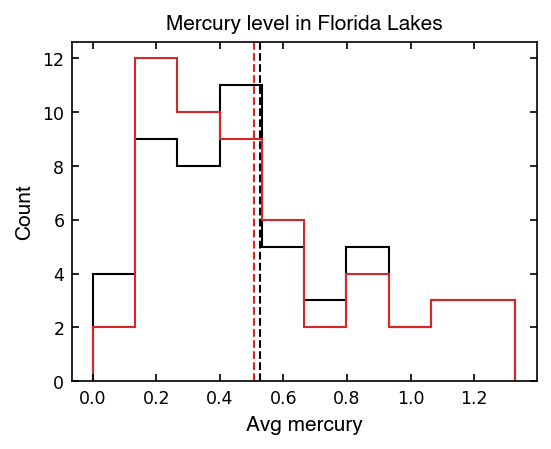

In [29]:
# Set up plot 
fig, ax = plt.subplots(facecolor='white', figsize=(4,3), dpi=150 )
set_plot_axis_label(ax, 'Avg mercury', 'Count')
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

# Plot original and mean
ax.hist(avg_mercury, histtype='step', range=(0, np.max(avg_mercury)), bins=10, 
        color='black')
ax.axvline(np.mean(avg_mercury), lw=1, color='black', ls='--')

# Plot resampled histogram and mean
avg_mercury_resamp = rng.choice(avg_mercury, len(avg_mercury))
ax.hist(avg_mercury_resamp, histtype='step', range=(0, np.max(avg_mercury)), bins=10,
        color='tab:red')
ax.axvline(np.mean(avg_mercury_resamp), lw=1, color='tab:red', ls='--')
plt.show()

It might be surprising that the mean has changed! All we did was resample from the original data and take the mean. If we do this many time, we'll get a distribution of means which we can think of as a set of possible outcomes if we had taken the measurements again and again.

Because we are reusing the same measurements to resample, this won't make our mean any more accurate (because we have no new data to go off of).

What this *does* do is show us how much our mean would vary if we repeated our experiment many times with the same number of observations and similar scatter in the data... It's a new way to **bootstrap** uncertainty when we didn't have any info about the error arrays to do error propagation!

Below, let's rum our resampling a bunch of times and see what values we get for the mean...

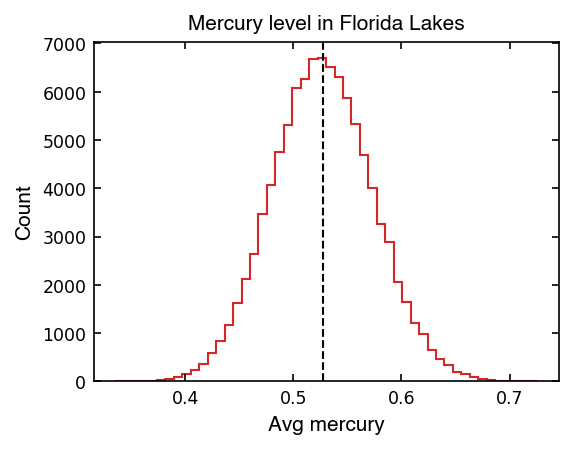

In [30]:
# plotting 
fig, ax = plt.subplots(facecolor='white', figsize=(4,3), dpi=150)
set_plot_axis_label(ax, 'Avg mercury', 'Count')
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

ax.axvline(np.mean(avg_mercury), lw=1, color='black', ls='--')

# random draw result
sample_times = 100000

mean_collection = []
for _ in range(sample_times): 
        avg_mercury_resamp = rng.choice(avg_mercury, len(avg_mercury))
        mean_collection.append(np.mean(avg_mercury_resamp))

ax.hist(mean_collection, histtype='step', color='tab:red', bins=50)
plt.show()

This looks like a normal (Gaussian) distribution, so we can talk about the dispersion of the mean in terms of the standard deviation! 

Now we can report the uncertainty of the mean on our original plot in a more satisfying way:

Mean mercury in Florida lakes is 0.53 with a 95% confidence interval of [0.44, 0.62]


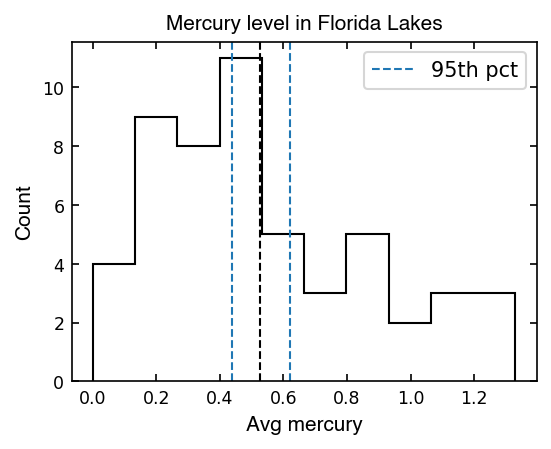

In [31]:
# Set up plot 
fig, ax = plt.subplots(facecolor='white', figsize=(4,3), dpi=150 )
set_plot_axis_label(ax, 'Avg mercury', 'Count')
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

# Plot original and mean
ax.hist(avg_mercury, histtype='step', range=(0, np.max(avg_mercury)), bins=10, 
        color='black')
ax.axvline(np.mean(avg_mercury), lw=1, color='black', ls='--')

# Calculate the 95% confidence interval [2.5%, 97.5%]
pct95_low = np.percentile(mean_collection, 2.5)
pct95_upp = np.percentile(mean_collection, 97.5)
ax.axvline(pct95_low, lw=1, color='tab:blue', ls='--', label='95th pct')
ax.axvline(pct95_upp, lw=1, color='tab:blue', ls='--')
ax.legend()

print(f'Mean mercury in Florida lakes is {np.mean(avg_mercury):1.2f}', end='')
print(f' with a 95% confidence interval of [{pct95_low:.2f}, {pct95_upp:.2f}]')
plt.show()

Now using the distribution of the bootstrapped means, we can capture the scatter in our data with N=59 observations if we were to repeat the trial many times. 

Now we can say we are 95% confident that the true mean mercury in Florida lakes is within our 95% confidence interval, given the measurements we made.

## [Assignment 2] What's the value for $\pi$?

In this assignment, you will need to use the MC method to estimate the values of $\pi$.

Assuming you have a quarter circle with the radius of 1 and a square that share it's edge with the quarter circle's 
radius (see the plot below). 

![Monte-Carlo pi](https://helloacm.com/wp-content/uploads/2015/11/Monte-Carlo01.jpg)

Therefore, we know:

$$
Area_{\rm quarter\ circle} = \pi r^2/4 \\
Area_{\rm square} = r^2
$$

The ratio of the two will be

$$\frac{Area_{\rm quarter\ circle}}{Area_{\rm square}} = \frac{\pi r^2/4}{r^2} = \frac{\pi}{4}$$

Rearange the equation and changes the area with the number of points we have:

$$\pi = 4 \frac{Area_{\rm quarter\ circle}}{Area_{\rm square}} = 4 \frac{N_{\rm quarter\ circle}}{N_{\rm square}}$$

where $N_{\rm quarter\ circle}$ is the number of points within the quarter circle and $N_{\rm square}$ is the number of points
within the square.

Tips:
1. You will need to generate two arrays with the random generator as the x and y axis of each points.
2. Calculate the number of points within the quarter circle and within the square
3. You get $\pi$ by dividing the two numbers and times 4

**Show that your $\pi$ has $< 1e-15$ difference from `np.pi`**

In [32]:
# [your code here]